# Co-Occurance of Tags (preGPT)

### Elbow Method Visualization

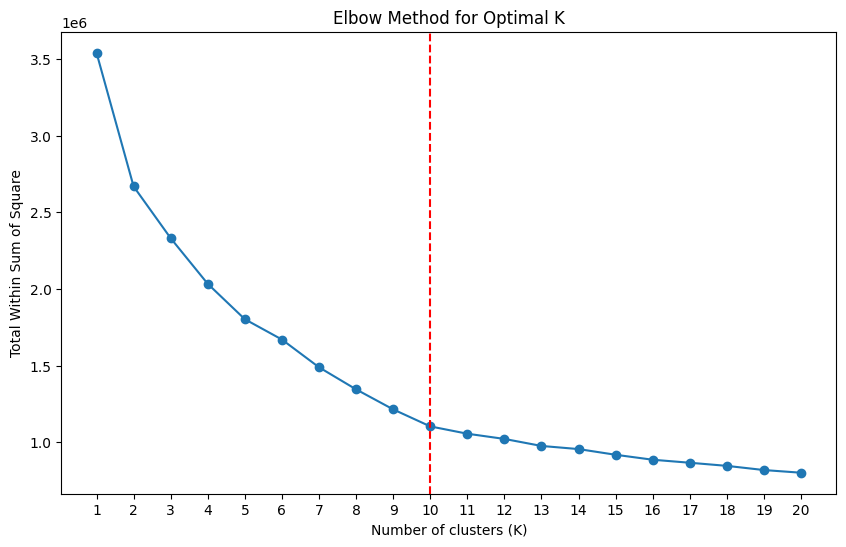

In [15]:
import matplotlib.pyplot as plt
import pickle
with open(file = 'elbow.pkl', mode = 'rb') as file:
    inertia = pickle.load(file)
K_range = range(1, 21)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Total Within Sum of Square')
plt.xticks(K_range)
# Draw a vertical line at x = 10
plt.axvline(x=10, color='red', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.show()

### Use Optimal K as 10 and Analyze

In [2]:
# Import Modules
import pandas as pd
import numpy as np
import pickle
import math
import sqlite3
# Import Data
with open('/data1/StackOverflow/Tag_Analysis/df_tags_2023.pickle', 'rb') as fr:
    df_tags = pickle.load(fr)
# Slice preGPT tags.
preGPT = df_tags[(df_tags['creation_date'] > '2021-09-01') & 
        (df_tags['creation_date'] < '2022-12-01')]
# Preprocess
from nltk import FreqDist
def wc(text):
    """
    Cleaning function to be used with our first wordcloud
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('-','')
        tags = tags.replace('.','DOT')
        tags = tags.replace('c++','Cpp')
        tags = tags.replace('c#','Csharp')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def clean_tags(text):
    """
    Cleaning function for tags
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def tag_freq(data):
    tags = data['tags'].str.replace('[\["\]]', '', regex=True)
    tags = [tag for i in tags.apply(lambda x: wc(x)) for tag in i.split(', ')]
    result = FreqDist(tags)
    return result
# Tags Preprocessing
preGPT['tags'] = preGPT['tags'].str.replace('[\["\]]', '', regex=True)
preGPT['tags'] = preGPT['tags'].str.replace('c#','Csharp')
preGPT['tags'] = preGPT['tags'].str.replace('c++','Cpp')
preGPT['tags'] = preGPT['tags'].str.replace('.','DOT')
preGPT['tags'] = preGPT['tags'].str.replace('><',' ')
preGPT['tags'] = preGPT['tags'].str.replace('>','')
preGPT['tags'] = preGPT['tags'].str.replace('-','')
preGPT = preGPT.reset_index(drop = True)
preGPT

/tmp/ipykernel_3476498/2475227766.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preGPT['tags'] = preGPT['tags'].str.replace('[\["\]]', '', regex=True)
/tmp/ipykernel_3476498/2475227766.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preGPT['tags'] = preGPT['tags'].str.replace('c#','Csharp')
/tmp/ipykernel_3476498/2475227766.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,creation_date,tags
0,2021-09-01 00:00:35.237,"nodeDOTjs, reactjs, express, axios, refreshtoken"
1,2021-09-01 00:00:55.583,"r, shiny"
2,2021-09-01 00:01:23.670,"java, installation, compilation, project, oper..."
3,2021-09-01 00:03:18.750,"firebase, nuxtDOTjs, firebasehosting"
4,2021-09-01 00:03:36.930,"r, dataDOTtable"
...,...,...
1810437,2022-11-30 23:58:57.893,"python, class, courseraapi"
1810438,2022-11-30 23:58:59.800,"css, angular, bootstrap5"
1810439,2022-11-21 12:43:43.470,"python, discord"
1810440,2022-11-16 15:58:53.977,"c, modem, glib"


In [3]:
# Co-occurance Matrix
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
co_occurrence_matrix = vectorizer.fit_transform(preGPT['tags']).T * vectorizer.fit_transform(preGPT['tags'])
# Calculate Similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(co_occurrence_matrix)

/home/cglee/anaconda3/envs/ahnlab/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [4]:
# Assuming you want to create, for example, 2 clusters
from sklearn.cluster import KMeans
num_clusters = 10 # Parameter.
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(similarity_matrix)

print("Clusters:", clusters)

/home/cglee/anaconda3/envs/ahnlab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters: [1 1 1 ... 1 1 5]


In [5]:
tag_name = vectorizer.get_feature_names_out().reshape(-1, 1).flatten().tolist()
tag_cluster = clusters.reshape(-1,1).flatten().tolist()
tagGroup = pd.DataFrame({'tag_name': tag_name, 'tag_cluster': tag_cluster})
tagGroup

,tag_name,tag_cluster
0,100mslive,1
1,1010data,1
2,128bit,1
3,12factor,1
4,16bit,1
...,...,...
44255,zxspectrum,1
44256,zynq,1
44257,zynqultrascale+,1
44258,zypper,1


In [6]:
# Get the number of entries in each group
unique, counts = np.unique(clusters, return_counts=True)
# Create a dictionary to store the cluster counts
cluster_counts = dict(zip(unique, counts))
# Print the cluster counts
for cluster, count in cluster_counts.items():
    print(f'Cluster {cluster}: {count} entries')

Cluster 0: 1754 entries
Cluster 1: 20433 entries
Cluster 2: 3322 entries
Cluster 3: 2530 entries
Cluster 4: 2735 entries
Cluster 5: 4806 entries
Cluster 6: 1951 entries
Cluster 7: 1045 entries
Cluster 8: 1453 entries
Cluster 9: 4231 entries


In [7]:
all_tags = tag_freq(preGPT)
all_tags = pd.DataFrame(all_tags, index = ['tags']).transpose().reset_index()

In [8]:
all_tags = all_tags.rename(columns = {'index': 'tag_name',
                           'tags': 'tag_count'})
df_merge = pd.merge(tagGroup, all_tags, on = 'tag_name')
df_merge

,tag_name,tag_cluster,tag_count
0,100mslive,1,2
1,1010data,1,1
2,128bit,1,9
3,12factor,1,5
4,16bit,1,25
...,...,...,...
42555,zxspectrum,1,2
42556,zynq,1,23
42557,zynqultrascale+,1,7
42558,zypper,1,9


In [15]:
#with open('cluster10.pkl', 'wb') as file:
#    pickle.dump(df_merge, file)

In [16]:
import pandas as pd
import pickle
with open('cluster10.pkl', 'rb') as file:
    df_merge = pickle.load(file)

In [17]:
# Extract top five posted in each tag group (to check which tags are in the tag group).
top5each = df_merge.groupby('tag_cluster').apply(lambda group: group.nlargest(10, 'tag_count')).reset_index(drop=True)

In [33]:
top5each[top5each['tag_cluster']==9]

,tag_name,tag_cluster,tag_count
90,javascript,9,203077
91,reactjs,9,104992
92,html,9,74597
93,css,9,53216
94,typescript,9,44438
95,arrays,9,33655
96,angular,9,31142
97,reactnative,9,23111
98,firebase,9,19626
99,jquery,9,19464


In [8]:
df_merge.groupby('tag_cluster')['tag_count'].sum()

tag_cluster
0      92603
1    1461568
2     813417
3     125082
4     269770
5     822520
6     179274
7     120984
8      98662
9    1082219
Name: tag_count, dtype: int64

### From Here, find a way to cluster each post. 